<a href="https://colab.research.google.com/github/charleswei2003/Pneumonia-using-CNN/blob/main/Pneumonia_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note 1: This version is created for Colab specifically. To use the model, download the chest xray dataset from kaggle and upload the whole file to your google drive. Then connect your google drive to this colab.

# V1_2Conv32_2MaxPool2x2_Dense128

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Define paths (adjust these to your actual directories)
base_dir = '/content/drive/MyDrive/chest/chest_xray'
train_folder = os.path.join(base_dir, 'train')
val_folder = os.path.join(base_dir, 'val')
test_folder = os.path.join(base_dir, 'test')

## Model Construction & Training

In [ ]:
# Data generators
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size=(64, 64),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=(64, 64),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            class_mode='binary')

# Calculate steps
steps_per_epoch = (training_set.samples + batch_size - 1) // batch_size
val_steps = (validation_generator.samples + batch_size - 1) // batch_size
test_steps = (test_set.samples + batch_size - 1) // batch_size

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(
    filepath='model_epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

# Train the model with validation data
history = cnn.fit(training_set,
                  steps_per_epoch=steps_per_epoch,
                  epochs=61,
                  validation_data=validation_generator,
                  validation_steps=val_steps,
                  callbacks=[checkpoint])

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8005 - loss: 0.4817

163/163 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.8008 - loss: 0.4809 - val_accuracy: 0.7500 - val_loss: 0.4829
Epoch 2/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8992 - loss: 0.2427

163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 636ms/step - accuracy: 0.8992 - loss: 0.2426 - val_accuracy: 0.6250 - val_loss: 1.0893
Epoch 3/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8964 - loss: 0.2405

163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 636ms/step - accuracy: 0.8966 - loss: 0.2403 - val_accuracy: 0.7500 - val_loss: 0.4655
Epoch 4/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9276 - loss: 0.1787

163/163 ━━━━━━━━━━━━━━━━━━━━ 147s 669ms/step - accuracy: 0.9276 - loss: 0.1787 - val_accuracy: 0.8125 - val_loss: 0.3149
Epoch 5/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.9320 - loss: 0.1737

163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 643ms/step - accuracy: 0.9320 - loss: 0.1736 - val_accuracy: 0.7500 - val_loss: 0.6320
Epoch 6/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.9284 - loss: 0.1789

163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 650ms/step - accuracy: 0.9284 - loss: 0.1789 - val_accuracy: 0.6250 - val_loss: 0.7077
Epoch 7/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9411 - loss: 0.1530

163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 638ms/step - accuracy: 0.9411 - loss: 0.1530 - val_accuracy: 0.6250 - val_loss: 0.5521
Epoch 8/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9405 - loss: 0.1570

163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 634ms/step - accuracy: 0.9405 - loss: 0.1570 - val_accuracy: 0.6250 - val_loss: 0.6342
Epoch 9/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.9435 - loss: 0.1425

163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 652ms/step - accuracy: 0.9435 - loss: 0.1425 - val_accuracy: 0.8125 - val_loss: 0.3379
Epoch 10/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9433 - loss: 0.1432

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 639ms/step - accuracy: 0.9433 - loss: 0.1431 - val_accuracy: 0.6250 - val_loss: 0.6945
Epoch 11/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.9469 - loss: 0.1407

163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 630ms/step - accuracy: 0.9469 - loss: 0.1407 - val_accuracy: 0.7500 - val_loss: 0.4805
Epoch 12/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9523 - loss: 0.1407

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 639ms/step - accuracy: 0.9523 - loss: 0.1407 - val_accuracy: 0.7500 - val_loss: 0.3245
Epoch 13/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9433 - loss: 0.1451

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 647ms/step - accuracy: 0.9434 - loss: 0.1450 - val_accuracy: 0.8750 - val_loss: 0.2871
Epoch 14/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9447 - loss: 0.1412

163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 655ms/step - accuracy: 0.9448 - loss: 0.1411 - val_accuracy: 0.8125 - val_loss: 0.3970
Epoch 15/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.9550 - loss: 0.1265

163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 630ms/step - accuracy: 0.9550 - loss: 0.1264 - val_accuracy: 0.8125 - val_loss: 0.3099
Epoch 16/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9578 - loss: 0.1077

163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 620ms/step - accuracy: 0.9578 - loss: 0.1077 - val_accuracy: 0.9375 - val_loss: 0.2652
Epoch 17/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9564 - loss: 0.1185

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 633ms/step - accuracy: 0.9564 - loss: 0.1185 - val_accuracy: 0.8125 - val_loss: 0.3394
Epoch 18/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9585 - loss: 0.1088

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 629ms/step - accuracy: 0.9585 - loss: 0.1088 - val_accuracy: 0.8750 - val_loss: 0.2204
Epoch 19/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9580 - loss: 0.1094

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 636ms/step - accuracy: 0.9580 - loss: 0.1094 - val_accuracy: 0.8750 - val_loss: 0.2809
Epoch 20/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.9570 - loss: 0.1027

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9570 - loss: 0.1027 - val_accuracy: 0.6250 - val_loss: 0.6961
Epoch 21/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.9630 - loss: 0.0990

163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 644ms/step - accuracy: 0.9630 - loss: 0.0990 - val_accuracy: 0.9375 - val_loss: 0.1735
Epoch 22/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9608 - loss: 0.1096

163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 624ms/step - accuracy: 0.9608 - loss: 0.1095 - val_accuracy: 0.7500 - val_loss: 0.3072
Epoch 23/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9676 - loss: 0.0925

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 637ms/step - accuracy: 0.9676 - loss: 0.0926 - val_accuracy: 0.7500 - val_loss: 0.2986
Epoch 24/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9649 - loss: 0.0941

163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 633ms/step - accuracy: 0.9649 - loss: 0.0942 - val_accuracy: 0.6875 - val_loss: 0.6057
Epoch 25/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9627 - loss: 0.1049

163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 620ms/step - accuracy: 0.9627 - loss: 0.1048 - val_accuracy: 1.0000 - val_loss: 0.1904
Epoch 26/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.9660 - loss: 0.0866

163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 643ms/step - accuracy: 0.9660 - loss: 0.0867 - val_accuracy: 0.8750 - val_loss: 0.2932
Epoch 27/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9616 - loss: 0.1054

163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 624ms/step - accuracy: 0.9616 - loss: 0.1054 - val_accuracy: 0.8750 - val_loss: 0.2084
Epoch 28/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9652 - loss: 0.0962

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 637ms/step - accuracy: 0.9652 - loss: 0.0962 - val_accuracy: 0.9375 - val_loss: 0.2577
Epoch 29/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9692 - loss: 0.0810

163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 621ms/step - accuracy: 0.9692 - loss: 0.0810 - val_accuracy: 0.9375 - val_loss: 0.1505
Epoch 30/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.9674 - loss: 0.0860

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 629ms/step - accuracy: 0.9674 - loss: 0.0859 - val_accuracy: 0.9375 - val_loss: 0.1426
Epoch 31/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9663 - loss: 0.0874

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 627ms/step - accuracy: 0.9663 - loss: 0.0874 - val_accuracy: 1.0000 - val_loss: 0.1566
Epoch 32/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9678 - loss: 0.0824

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 633ms/step - accuracy: 0.9677 - loss: 0.0824 - val_accuracy: 0.7500 - val_loss: 0.4998
Epoch 33/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.9663 - loss: 0.0900

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 645ms/step - accuracy: 0.9663 - loss: 0.0899 - val_accuracy: 1.0000 - val_loss: 0.1162
Epoch 34/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.9676 - loss: 0.0912

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 634ms/step - accuracy: 0.9676 - loss: 0.0912 - val_accuracy: 0.8750 - val_loss: 0.2175
Epoch 35/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9756 - loss: 0.0730

163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 638ms/step - accuracy: 0.9756 - loss: 0.0730 - val_accuracy: 0.8125 - val_loss: 0.2817
Epoch 36/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9733 - loss: 0.0730

163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 661ms/step - accuracy: 0.9732 - loss: 0.0730 - val_accuracy: 0.8125 - val_loss: 0.2193
Epoch 37/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9735 - loss: 0.0702

163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 636ms/step - accuracy: 0.9735 - loss: 0.0702 - val_accuracy: 0.8125 - val_loss: 0.2543
Epoch 38/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9712 - loss: 0.0666

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 624ms/step - accuracy: 0.9712 - loss: 0.0667 - val_accuracy: 0.8750 - val_loss: 0.1984
Epoch 39/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9685 - loss: 0.0829

163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 639ms/step - accuracy: 0.9685 - loss: 0.0829 - val_accuracy: 0.8750 - val_loss: 0.2733
Epoch 40/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.9727 - loss: 0.0745

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9727 - loss: 0.0745 - val_accuracy: 1.0000 - val_loss: 0.1038
Epoch 41/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9694 - loss: 0.0787

163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 672ms/step - accuracy: 0.9694 - loss: 0.0786 - val_accuracy: 0.9375 - val_loss: 0.1074
Epoch 42/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9700 - loss: 0.0815

163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 636ms/step - accuracy: 0.9700 - loss: 0.0815 - val_accuracy: 1.0000 - val_loss: 0.0825
Epoch 43/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9754 - loss: 0.0660

163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 624ms/step - accuracy: 0.9754 - loss: 0.0661 - val_accuracy: 0.9375 - val_loss: 0.1582
Epoch 44/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.9755 - loss: 0.0718

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 626ms/step - accuracy: 0.9755 - loss: 0.0718 - val_accuracy: 0.9375 - val_loss: 0.1255
Epoch 45/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9804 - loss: 0.0553

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 637ms/step - accuracy: 0.9804 - loss: 0.0554 - val_accuracy: 1.0000 - val_loss: 0.0973
Epoch 46/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.9742 - loss: 0.0673

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 646ms/step - accuracy: 0.9742 - loss: 0.0672 - val_accuracy: 1.0000 - val_loss: 0.0823
Epoch 47/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9770 - loss: 0.0601

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 624ms/step - accuracy: 0.9770 - loss: 0.0601 - val_accuracy: 0.9375 - val_loss: 0.1133
Epoch 48/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.9731 - loss: 0.0713

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 634ms/step - accuracy: 0.9731 - loss: 0.0713 - val_accuracy: 1.0000 - val_loss: 0.0918
Epoch 49/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9792 - loss: 0.0620

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 627ms/step - accuracy: 0.9792 - loss: 0.0620 - val_accuracy: 1.0000 - val_loss: 0.1697
Epoch 50/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.9774 - loss: 0.0593

163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 644ms/step - accuracy: 0.9774 - loss: 0.0593 - val_accuracy: 0.9375 - val_loss: 0.1363
Epoch 51/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9771 - loss: 0.0567

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 627ms/step - accuracy: 0.9771 - loss: 0.0567 - val_accuracy: 0.9375 - val_loss: 0.0995
Epoch 52/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9803 - loss: 0.0561

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 636ms/step - accuracy: 0.9803 - loss: 0.0561 - val_accuracy: 0.9375 - val_loss: 0.1535
Epoch 53/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.9785 - loss: 0.0559

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 630ms/step - accuracy: 0.9785 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 0.1106
Epoch 54/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.9742 - loss: 0.0707

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 630ms/step - accuracy: 0.9742 - loss: 0.0707 - val_accuracy: 0.9375 - val_loss: 0.1962
Epoch 55/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.9803 - loss: 0.0572

163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 642ms/step - accuracy: 0.9803 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 0.1083
Epoch 56/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9788 - loss: 0.0566

163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 624ms/step - accuracy: 0.9788 - loss: 0.0566 - val_accuracy: 0.8750 - val_loss: 0.2517
Epoch 57/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9789 - loss: 0.0566

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 639ms/step - accuracy: 0.9789 - loss: 0.0566 - val_accuracy: 1.0000 - val_loss: 0.0805
Epoch 58/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9789 - loss: 0.0545

163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 627ms/step - accuracy: 0.9789 - loss: 0.0545 - val_accuracy: 1.0000 - val_loss: 0.0841
Epoch 59/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9790 - loss: 0.0569

163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 624ms/step - accuracy: 0.9790 - loss: 0.0569 - val_accuracy: 0.9375 - val_loss: 0.1148
Epoch 60/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9809 - loss: 0.0575

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 628ms/step - accuracy: 0.9809 - loss: 0.0575 - val_accuracy: 0.9375 - val_loss: 0.1626
Epoch 61/61
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.9789 - loss: 0.0582

163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 643ms/step - accuracy: 0.9789 - loss: 0.0582 - val_accuracy: 0.8125 - val_loss: 0.2598


## Model Evaluation

In [ ]:
# to load the model later
from tensorflow.keras.models import load_model
cnn_model = load_model('model_epoch_05.h5')

In [ ]:
# Evaluate the model
test_accu = cnn.evaluate(test_set, steps=test_steps)
print('The testing accuracy is:', test_accu[1] * 100, '%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.9158 - loss: 0.2927
The testing accuracy is: 91.18589758872986 %


## Results Visualization

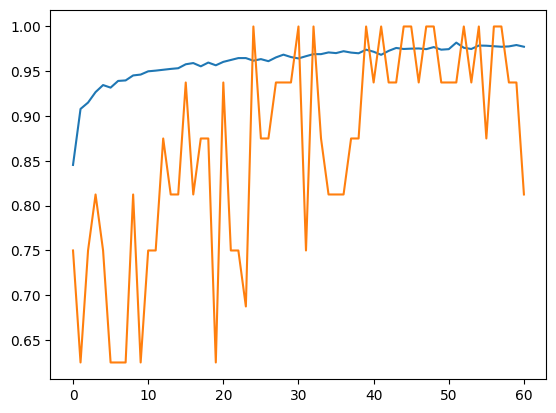

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

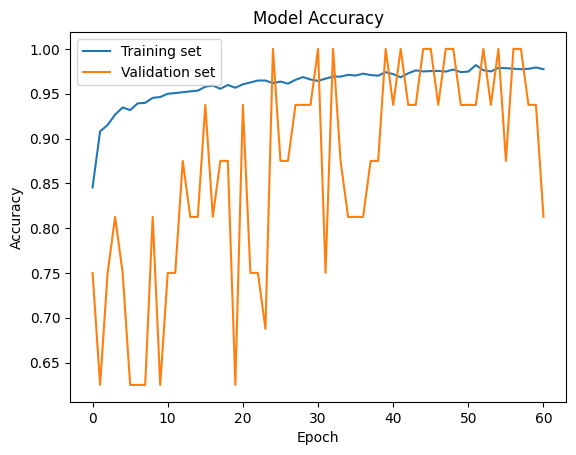

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()